# 📘 Introduction to Naive Bayes Classifier

Naive Bayes is a **probabilistic classification algorithm** used for both binary and multi-class problems.  
It is built on two fundamental concepts:

1. **Probability theory**
2. **Bayes' Theorem**

---

## 🔢 1. Probability Refresher

### **Independent Events**
Two events are independent if the occurrence of one does **not** affect the probability of the other.

Example (from handwritten notes):
- Rolling a die →  
  $P(1) = \frac{1}{6}$,  
  $P(2) = \frac{1}{6}$

Rolling a 1 does not change the probability of rolling a 2 → **Independent events**.

---

### **Dependent Events**
Events are dependent when the outcome of one **affects** the outcome of the next.

Example (bag of marbles):  
If an orange marble is removed first, the probability of drawing a yellow marble changes.

This introduces **conditional probability**:

$$
P(A \mid B) = \text{Probability of A given B has occurred}
$$

---

## 🔁 2. Bayes' Theorem

Bayes' Theorem allows us to reverse conditional probability:

$$
P(A \mid B) = \frac{P(B \mid A)\,P(A)}{P(B)}
$$

Where:

- $P(A \mid B)$: Probability of event A **given** B  
- $P(B \mid A)$: Probability of event B **given** A  
- $P(A)$: Prior probability of A  
- $P(B)$: Prior probability of B  

Bayes' theorem is the core of the Naive Bayes algorithm.

---

## 🎯 3. Naive Bayes Assumption (Why "Naive"?)

Naive Bayes assumes that **all features are independent given the class**:

$$
P(x_1, x_2, \dots, x_n \mid y) = P(x_1 \mid y)\,P(x_2 \mid y)\,\dots\,P(x_n \mid y)
$$

This is rarely true in real data, but the algorithm still performs surprisingly well.

---

## 🎾 4. Intuition Through an Example (Play Tennis)

To predict whether someone will play tennis based on Outlook and Temperature, Naive Bayes computes:

$$
P(\text{Yes} \mid \text{Sunny, Hot}) 
\propto 
P(\text{Sunny} \mid \text{Yes}) \cdot P(\text{Hot} \mid \text{Yes}) \cdot P(\text{Yes})
$$

$$
P(\text{No} \mid \text{Sunny, Hot}) 
\propto 
P(\text{Sunny} \mid \text{No}) \cdot P(\text{Hot} \mid \text{No}) \cdot P(\text{No})
$$

The class with the higher probability becomes the prediction.

From the handwritten notes, the final results were:

- $P(\text{Yes}) \approx 27\%$  
- $P(\text{No}) \approx 73\%$

So the prediction is **No — will not play tennis**.

---

## 💡 Why Naive Bayes Works Well

- Extremely **fast** and **simple**
- Works well with **small datasets**
- Performs exceptionally in **text classification**  
- Handles noisy data
- Produces **probabilistic** outputs

---



# 📗 Types of Naive Bayes Classifiers

Naive Bayes has **three main variants**, each designed for different types of feature distributions:

1. **Bernoulli Naive Bayes**
2. **Multinomial Naive Bayes**
3. **Gaussian Naive Bayes**

Each variant assumes a different statistical distribution of the input features.

---

## 1️⃣ Bernoulli Naive Bayes

Used when **features are binary** — that is, each feature can take only two values (0 or 1).

Examples:
- Whether a word appears in an email (present = 1, absent = 0)
- Whether a customer clicked or not (click = 1, no click = 0)
- Whether a symptom is present in medical diagnosis

Bernoulli NB assumes:

$$
x_i \in \{0, 1\}
$$

If most features in your dataset follow a **Bernoulli distribution**, this is the appropriate model.

---

## 2️⃣ Multinomial Naive Bayes

Used when features represent **counts** or **frequency**.

Most commonly used in **text classification**, such as:
- Spam vs. Ham emails  
- Sentiment analysis  
- Document categorization

Examples:
- Number of times a word appears in a message
- Term frequencies (TF)
- TF-IDF transformed features (often works well despite being real-valued)

Multinomial NB models:

$$
P(x_i \mid y) = \frac{(\text{count of feature } i \text{ in class } y) + \alpha}{(\sum \text{counts in class } y) + \alpha \cdot n}
$$

It works extremely well when input features are:
- Bag of Words
- TF-IDF vectors
- Word count features

---

## 3️⃣ Gaussian Naive Bayes

Used when features are **continuous** and follow a **normal (Gaussian) distribution**.

Typical in datasets where values are measurable quantities:
- Height, weight  
- Temperature  
- Iris dataset features (sepal length, petal width, etc.)

Gaussian NB assumes:

$$
x_i \sim \mathcal{N}(\mu, \sigma^2)
$$

Meaning each feature is modeled as a bell-curve distribution.

---

## 📝 How to Choose the Right Variant?

Use the following rules (from handwritten notes):

### ✔ If features are **binary (0/1)** → **Bernoulli Naive Bayes**

### ✔ If features are **counts or frequencies** → **Multinomial Naive Bayes**

### ✔ If features are **continuous** → **Gaussian Naive Bayes**

This simple rule helps decide the appropriate variant for most real-world problems.

---



In [2]:
# -----------------------------------------------
# Load the Iris Dataset and Split into Train/Test
# -----------------------------------------------

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load iris dataset
# X -> features (sepal length, sepal width, petal length, petal width)
# y -> target labels (0,1,2 corresponding to the 3 Iris species)
X, y = load_iris(return_X_y=True)

# Convert X to a DataFrame for beautiful printing
feature_names = load_iris().feature_names
X_df = pd.DataFrame(X, columns=feature_names)

# Convert y to a DataFrame for neat display
y_df = pd.DataFrame(y, columns=["target"])

# Print X beautifully
print("🔹 Features (X):")
display(X_df.head())     # display() looks nice in notebooks

# Print y beautifully
print("🔹 Target (y):")
display(y_df.head())

# -----------------------------------------------
# If you also want to see shapes (recommended)
# -----------------------------------------------
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


🔹 Features (X):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


🔹 Target (y):


,target
0,0
1,0
2,0
3,0
4,0



Shape of X: (150, 4)
Shape of y: (150,)


In [3]:
# Split the dataset into training and testing sets
# X, y           → full dataset (features and labels)
# test_size=0.30 → 30% of data goes to testing, 70% to training
# random_state=0 → ensures reproducibility; the same split occurs every run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# 🌼 Why Use **Gaussian Naive Bayes** for the Iris Dataset?

The Iris dataset contains **continuous numerical features**, such as:

- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

These are **real-valued measurements**, not counts, not binary values.

Naive Bayes has three major variants:

1. **Bernoulli NB** → for binary features (0/1)  
2. **Multinomial NB** → for count or frequency-based features (e.g., word counts)  
3. **Gaussian NB** → for continuous, real-valued features that follow a normal distribution

---

## ✔ Iris Features Are Continuous  
Since each feature is a continuous measurement, the appropriate probability model is the **Gaussian (Normal) Distribution**.

Gaussian Naive Bayes assumes:

$$
x_i \sim \mathcal{N}(\mu, \sigma^2)
$$

Meaning each feature value $x_i$ is modeled using a bell-curve distribution characterized by:

- Mean ($\mu$)
- Variance ($\sigma^2$)

This matches the nature of the Iris dataset perfectly.

---

## ✔ Why Not Multinomial or Bernoulli?

### ❌ Not Multinomial NB  
Multinomial NB expects **counts or frequencies**, commonly seen in text (bag of words).  
The Iris features are not counts — they are measurements.

### ❌ Not Bernoulli NB  
Bernoulli NB expects **binary features** such as 0/1 (present/absent).  
Again, Iris features are continuous.

---

## 🎯 Conclusion  
Gaussian Naive Bayes is ideal because:

- The dataset features are **continuous**  
- Gaussian NB models continuous data effectively  
- It performs very well on numeric datasets like Iris

Therefore, we choose **Gaussian Naive Bayes** for training the model.


# 📈 Why Visualizing a Bell Curve Matters Before Using Gaussian Naive Bayes

Gaussian Naive Bayes assumes that **each feature in the dataset follows a normal (Gaussian) distribution**:

$$
x_i \sim \mathcal{N}(\mu, \sigma^2)
$$

This means the values for each feature should roughly form a **bell-shaped curve** when plotted.

---

## 🔍 Why do we care about the bell curve?

Gaussian Naive Bayes uses the probability density function (PDF) of the normal distribution:

$$
P(x \mid y) = \frac{1}{\sqrt{2\pi\sigma_y^2}}
\exp\left( -\frac{(x - \mu_y)^2}{2\sigma_y^2} \right)
$$

This formula only makes sense when data is:

- **Continuous**
- **Approximately symmetric**
- **Clustered around a mean**
- **Not heavily skewed**

In the Iris dataset:
- Sepal length  
- Sepal width  
- Petal length  
- Petal width  

…all are **continuous biological measurements**, which naturally tend to follow bell curve–like distributions.

---

## 🌼 Biological measurements often follow a Gaussian distribution

Most natural features in plants and animals (height, length, weight, etc.) are normally distributed because they result from many small independent factors acting together.

This is why **the Iris dataset is a classic example** where Gaussian Naive Bayes performs extremely well.

---

## 🎯 Conclusion

Before predicting or evaluating, it's important to understand:

- The **shape** of the data justifies the algorithm.
- Iris features look like **bell curves**, so Gaussian NB is the right choice.
- This aligns perfectly with the model’s mathematical assumptions.

Next, we will actually *plot* these distributions to visually confirm the Gaussian shape.


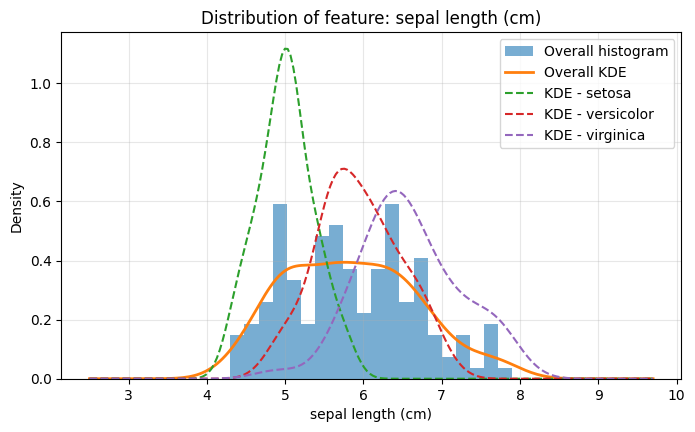

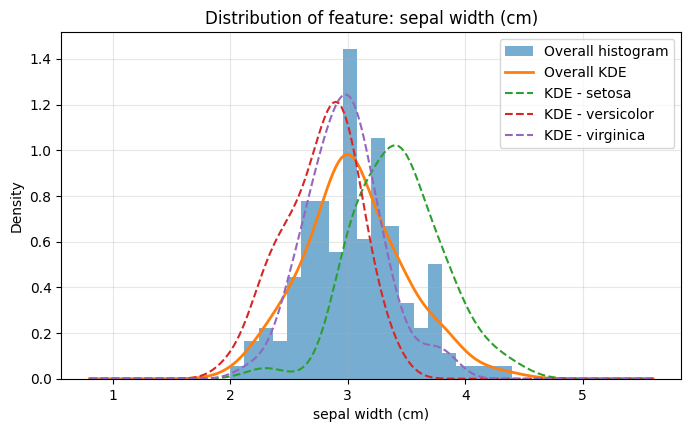

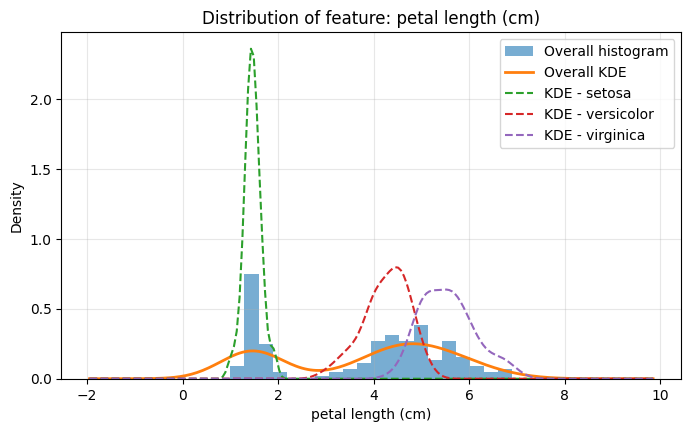

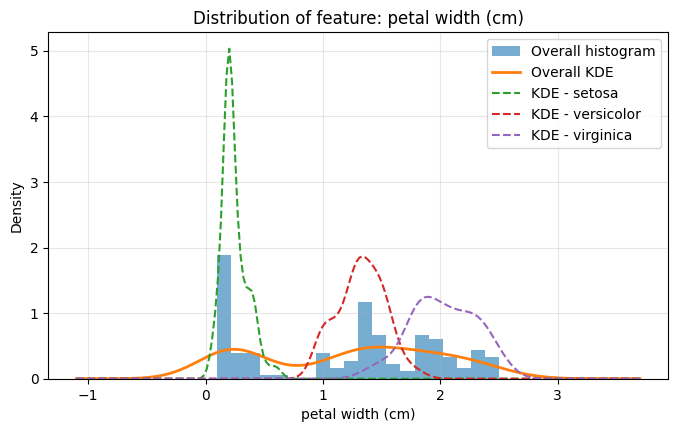

In [11]:
# ---------------------------------------------------------
# Plot bell-curve-like distributions for each Iris feature
# Histogram + Gaussian KDE (Overall + per-class)
# NumPy 2.0 compatible (uses np.ptp instead of values.ptp())
# ---------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd

# Load Iris dataset
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Create DataFrame (optional)
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

# Plot each feature individually
for i, feat in enumerate(feature_names):
    values = X[:, i]

    plt.figure(figsize=(8, 4.5))

    # Histogram (density normalized to form a distribution)
    plt.hist(values, bins=20, density=True, alpha=0.6, label="Overall histogram")

    # Overall KDE
    kde_all = gaussian_kde(values)

    # NumPy 2.0 safe peak-to-peak calculation
    x_min = values.min() - 0.5 * np.ptp(values)
    x_max = values.max() + 0.5 * np.ptp(values)
    xs = np.linspace(x_min, x_max, 200)

    plt.plot(xs, kde_all(xs), linewidth=2, label="Overall KDE")

    # Class-wise KDEs
    for cls in np.unique(y):
        cls_values = X[y == cls, i]
        kde_cls = gaussian_kde(cls_values)
        plt.plot(xs, kde_cls(xs), linestyle="--", linewidth=1.5, label=f"KDE - {target_names[cls]}")

    # Labels & title
    plt.title(f"Distribution of feature: {feat}")
    plt.xlabel(feat)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(alpha=0.3)

    plt.show()


In [6]:
# Import the Gaussian Naive Bayes classifier
# This variant is used when features are continuous and assumed to follow a normal distribution
from sklearn.naive_bayes import GaussianNB

# Create an instance of the GaussianNB classifier
# The model will learn mean and variance of each feature for each class
gaussian_nb = GaussianNB()

# Train (fit) the model using the training data
# X_train → feature values
# y_train → corresponding class labels
# During training, the classifier computes class-wise statistics needed for prediction
gaussian_nb.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [16]:
# Use the trained Gaussian Naive Bayes model to make predictions on the test set
# X_test → unseen feature data
# The model uses learned class statistics (mean, variance, prior probability) 
# to compute the probability of each class for every sample and selects the highest
y_pred = gaussian_nb.predict(X_test)

In [9]:
# -----------------------------------------------
# Evaluation Metrics for Gaussian Naive Bayes
# -----------------------------------------------

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# 1️⃣ Accuracy Score
# Measures how many predictions the model got correct out of all predictions.
accuracy = accuracy_score(y_test, y_pred)
print("🔹 Accuracy Score:", accuracy)

# 2️⃣ Confusion Matrix
# Shows how many samples were correctly/incorrectly classified per class.
cm = confusion_matrix(y_test, y_pred)

# Convert to a DataFrame for cleaner printing
cm_df = pd.DataFrame(
    cm,
    index=["Actual Setosa", "Actual Versicolor", "Actual Virginica"],
    columns=["Predicted Setosa", "Predicted Versicolor", "Predicted Virginica"]
)

print("\n🔹 Confusion Matrix:")
display(cm_df)

# 3️⃣ Classification Report
# Includes precision, recall, f1-score for each class.
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))


🔹 Accuracy Score: 1.0

🔹 Confusion Matrix:


,Predicted Setosa,Predicted Versicolor,Predicted Virginica
Actual Setosa,16,0,0
Actual Versicolor,0,18,0
Actual Virginica,0,0,11



🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 📊 Evaluation Metrics for Gaussian Naive Bayes

After training our model and generating predictions, we evaluate its performance using several standard classification metrics. Each metric gives insight into a different aspect of the model’s behavior.

---

## ✅ 1. Accuracy Score

Accuracy measures the **overall correctness** of the model:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}
$$

- Easy to understand  
- Good when classes are balanced  
- Not reliable for imbalanced datasets  

---

## ✅ 2. Confusion Matrix

A confusion matrix shows **how many samples were correctly and incorrectly classified for each class**.

It is a table where:

- **Rows** → Actual class  
- **Columns** → Predicted class  

Example structure:

|               | Pred Setosa | Pred Versicolor | Pred Virginica |
|---------------|-------------|------------------|----------------|
| **Actual Setosa**     |       TP      |       FP1        |       FP2       |
| **Actual Versicolor** |       FP3     |       TP         |       FP4       |
| **Actual Virginica**  |       FP5     |       FP6        |       TP        |

Key terms:
- **TP (True Positive)** → Correct predictions  
- **FP (False Positive)** → Model incorrectly predicted a class  

The confusion matrix helps identify which classes the model confuses with each other.

---

## ✅ 3. Classification Report

The classification report provides:

### **Precision**
$$
\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}
$$

How many predictions **for a class** were actually correct?

### **Recall**
$$
\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}
$$

How many samples **of that class** did the model correctly identify?

### **F1-Score**
$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision + Recall}}
$$

The harmonic mean of precision and recall — useful when both matter.

---

## 🎯 Summary

- **Accuracy** → Overall correctness  
- **Confusion Matrix** → Class-wise correctness and mistakes  
- **Precision** → Out of predicted positives, how many are right  
- **Recall** → Out of actual positives, how many model caught  
- **F1-score** → Balance between precision and recall  

These metrics together give a complete picture of how well Gaussian Naive Bayes performs on the Iris dataset.


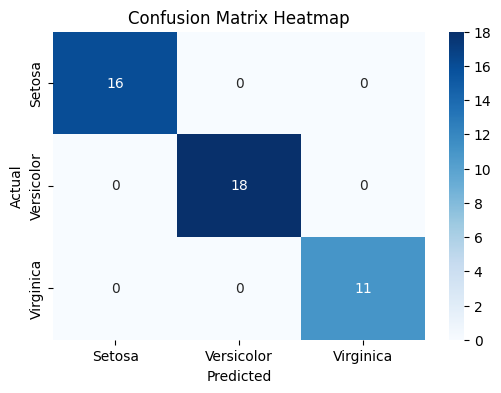

In [13]:
# -----------------------------------------------
# Confusion Matrix Heatmap Visualization
# -----------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Class names for the Iris dataset
class_names = ["Setosa", "Versicolor", "Virginica"]

plt.figure(figsize=(6, 4))

# Create a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=class_names,
            yticklabels=class_names)

plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
# -----------------------------------------------
# Testing the Model with Unseen (Manually Created) Data
# -----------------------------------------------

import numpy as np

# Create some new samples (unseen during training)
# Format: [sepal_length, sepal_width, petal_length, petal_width]
unseen_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],   # Looks like Setosa
    [6.0, 2.9, 4.5, 1.5],   # Likely Versicolor
    [6.7, 3.0, 5.8, 2.2]    # Likely Virginica
])

# Predict using the trained model
unseen_pred = gaussian_nb.predict(unseen_samples)

print("Predicted Class Labels:", unseen_pred)


Predicted Class Labels: [0 1 2]


In [17]:
# Map numeric labels to actual Iris species names
label_map = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}

readable_predictions = [label_map[i] for i in unseen_pred]

print("\nReadable Predictions:")
for sample, pred in zip(unseen_samples, readable_predictions):
    print(f"Input: {sample} --> Predicted Flower: {pred}")



Readable Predictions:
Input: [5.1 3.5 1.4 0.2] --> Predicted Flower: Setosa
Input: [6.  2.9 4.5 1.5] --> Predicted Flower: Versicolor
Input: [6.7 3.  5.8 2.2] --> Predicted Flower: Virginica


In [18]:
# -----------------------------------------------
# Helper: predict_flower
# Reusable function to predict Iris species for new samples
# -----------------------------------------------

import numpy as np

# Map numeric labels to species names
label_map = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}

def predict_flower(samples, return_proba=False):
    """
    Predict Iris species for given sample(s) using the trained gaussian_nb model.

    Parameters
    ----------
    samples : array-like
        A single sample as [sepal_length, sepal_width, petal_length, petal_width]
        or an array-like of shape (n_samples, 4).
    return_proba : bool, default False
        If True, also return class probabilities from predict_proba.

    Returns
    -------
    preds_numeric : np.ndarray
        Numeric class labels (0, 1, 2).
    preds_names : list
        Human-readable class names corresponding to numeric labels.
    proba : np.ndarray (optional)
        Class probabilities for each sample (returned only if return_proba=True).
    """
    # Convert to numpy array for consistent handling
    arr = np.array(samples)

    # If single 1D sample provided (shape (4,)), convert to shape (1,4)
    if arr.ndim == 1:
        if arr.shape[0] != 4:
            raise ValueError("Single sample must have 4 features: [sepal_length, sepal_width, petal_length, petal_width].")
        arr = arr.reshape(1, -1)
    elif arr.ndim == 2:
        if arr.shape[1] != 4:
            raise ValueError("Each sample must have 4 features (n_samples, 4).")
    else:
        raise ValueError("Input must be 1D (single sample) or 2D (multiple samples).")

    # Predict numeric labels
    preds_numeric = gaussian_nb.predict(arr)

    # Map to readable names
    preds_names = [label_map[int(lbl)] for lbl in preds_numeric]

    if return_proba:
        # predict_proba gives probability for each class (columns correspond to classes 0,1,2)
        proba = gaussian_nb.predict_proba(arr)
        return preds_numeric, preds_names, proba

    return preds_numeric, preds_names

# -----------------------------------------------
# Example usage (single sample and multiple samples)
# -----------------------------------------------

# Single sample (looks like Setosa)
sample1 = [5.1, 3.5, 1.4, 0.2]
num1, name1 = predict_flower(sample1)
print("Single sample prediction ->", num1, name1)

# Multiple samples
samples = [
    [5.1, 3.5, 1.4, 0.2],   # Setosa
    [6.0, 2.9, 4.5, 1.5],   # Versicolor
    [6.7, 3.0, 5.8, 2.2]    # Virginica
]
nums, names = predict_flower(samples)
print("\nBatch predictions:")
for s, n_num, n_name in zip(samples, nums, names):
    print(f"Input: {s} -> Label: {n_num}, Species: {n_name}")

# Example with probabilities
nums_p, names_p, probs = predict_flower(samples, return_proba=True)
print("\nPredictions with probabilities:")
for s, n_num, n_name, p in zip(samples, nums_p, names_p, probs):
    print(f"Input: {s} -> {n_name} (label {n_num}), probs: {np.round(p, 3)}")


Single sample prediction -> [0] ['Setosa']

Batch predictions:
Input: [5.1, 3.5, 1.4, 0.2] -> Label: 0, Species: Setosa
Input: [6.0, 2.9, 4.5, 1.5] -> Label: 1, Species: Versicolor
Input: [6.7, 3.0, 5.8, 2.2] -> Label: 2, Species: Virginica

Predictions with probabilities:
Input: [5.1, 3.5, 1.4, 0.2] -> Setosa (label 0), probs: [1. 0. 0.]
Input: [6.0, 2.9, 4.5, 1.5] -> Versicolor (label 1), probs: [0.    0.985 0.015]
Input: [6.7, 3.0, 5.8, 2.2] -> Virginica (label 2), probs: [0. 0. 1.]
